In [ ]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Visualizations

### Model performance comparasion

In [25]:
# Select your model result folders here #
experiment_relative_paths = [
    r"outputs/2025-08-04_22-52-18_dan_250",
    r"outputs/2025-08-04_22-52-39_dan_750",
    r"outputs/2025-08-04_22-52-51_dan_1500",
]

xMetric = ["ResVort", "MSE"]

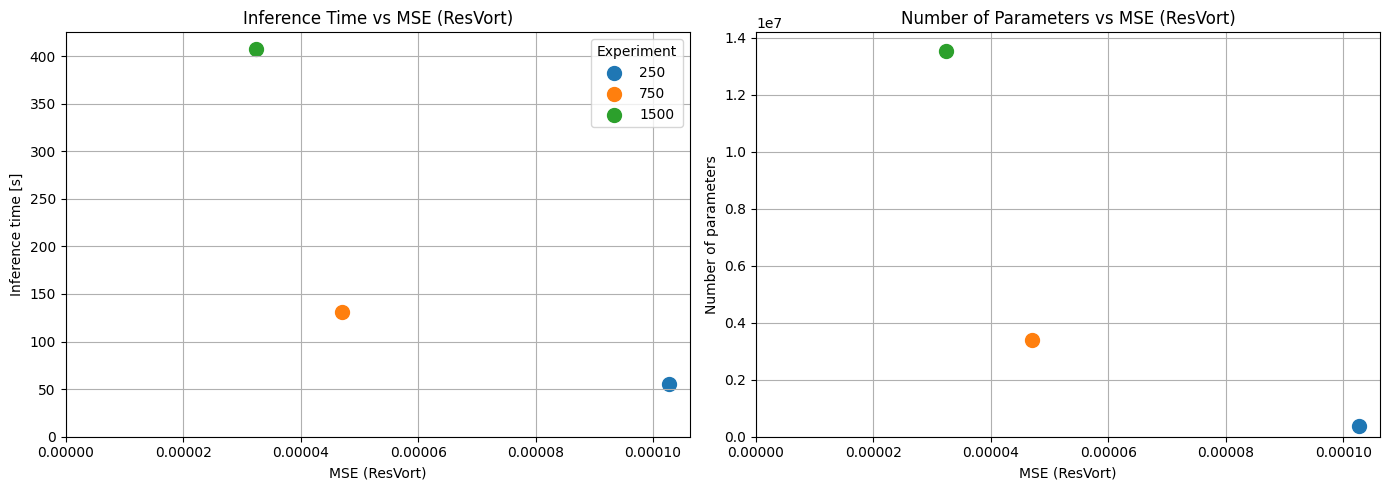

In [26]:
# Extract and visualize the data #

from pathlib import Path
import os
import re
import matplotlib.pyplot as plt

experiment_dirs = [project_root / Path(p) for p in experiment_relative_paths]

experiment_names = []
inference_times = []
target_metric = []
num_parameters = []

for exp_dir in experiment_dirs:
    results_path = exp_dir / "test_results.txt"
    with open(results_path, "r") as f:
        lines = f.readlines()
    # Extract experiment name (remove date/time prefix)
    for line in lines:
        if line.startswith("Experiment:"):
            exp_full = line.split(":", 1)[1].strip()
            # Remove date/time prefix (keep only the part after the last underscore)
            exp_name = "_".join(exp_full.split("_")[3:]) if len(exp_full.split("_")) > 3 else exp_full
            experiment_names.append(exp_name)
            break
    # Extract inference time
    for line in lines:
        if line.startswith("Inference time"):
            time_val = float(re.findall(r"[\d.]+", line)[0])
            inference_times.append(time_val)
            break
    # Extract Metric for Target
    in_target = False
    for line in lines:
        if f"Metrics for output '{xMetric[0]}':" in line:
            in_target = True
        elif in_target and f"{xMetric[1]}:" in line:
            metric_val = float(re.findall(r"[\d.]+e[+-]?\d+", line)[0])
            target_metric.append(metric_val)
            break
    # Extract number of parameters
    for line in lines:
        if line.startswith("Number of trainable parameters:"):
            n_params = int(re.findall(r"\d+", line)[0])
            num_parameters.append(n_params)
            break

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Plot 1: Inference time
for i, name in enumerate(experiment_names):
    ax1.scatter(target_metric[i], inference_times[i], label=name, s=100)
ax1.set_xlabel(f"{xMetric[1]} ({xMetric[0]})")
ax1.set_ylabel("Inference time [s]")
ax1.set_title(f"Inference Time vs {xMetric[1]} ({xMetric[0]})")
ax1.grid(True)
ax1.legend(title="Experiment")
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)

# Plot 2: Number of parameters
for i, name in enumerate(experiment_names):
    ax2.scatter(target_metric[i], num_parameters[i], label=name, s=100)
ax2.set_xlabel(f"{xMetric[1]} ({xMetric[0]})")
ax2.set_ylabel("Number of parameters")
ax2.set_title(f"Number of Parameters vs {xMetric[1]} ({xMetric[0]})")
ax2.grid(True)
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()